## Clustering

In [189]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

df = pd.read_csv('User_Knowledge.csv')

df.loc[df.UNS == 'very_low','grade'] = 0
df.loc[df.UNS == 'Low','grade'] = 1
df.loc[df.UNS == 'Middle','grade'] = 2
df.loc[df.UNS == 'High','grade'] = 3

df.sample(5)

,STG,SCG,STR,LPR,PEG,UNS,grade
57,0.090,0.600,0.66,0.19,0.59,Middle,2.0
109,0.299,0.295,0.80,0.37,0.84,High,3.0
44,0.115,0.350,0.65,0.27,0.04,very_low,0.0
2,0.060,0.060,0.05,0.25,0.33,Low,1.0
31,0.150,0.295,0.75,0.65,0.24,Low,1.0


#### Attribute Information

- STG (The degree of study time for goal object materails), (input value)
- SCG (The degree of repetition number of user for goal object materails) (input value) 
- STR (The degree of study time of user for related objects with goal object) (input value) 
- LPR (The exam performance of user for related objects with goal object) (input value) 
- PEG (The exam performance of user for goal objects) (input value) 
- UNS (The knowledge level of user) (target value) 
 - Very Low: 50 
 - Low:129 
 - Middle: 122 
 - High 130

In [190]:
y = list(df['UNS'])
#y = df.grade

# feature selection, dropping SCG
X = df.drop(columns=['SCG']).iloc[:,0:4]
# keeping all features
#X = df.iloc[:,0:5]

In [191]:
df['UNS'].value_counts()

Middle      88
Low         83
High        63
very_low    24
Name: UNS, dtype: int64

In [192]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

### Hierarchical clustering (unnormalized)

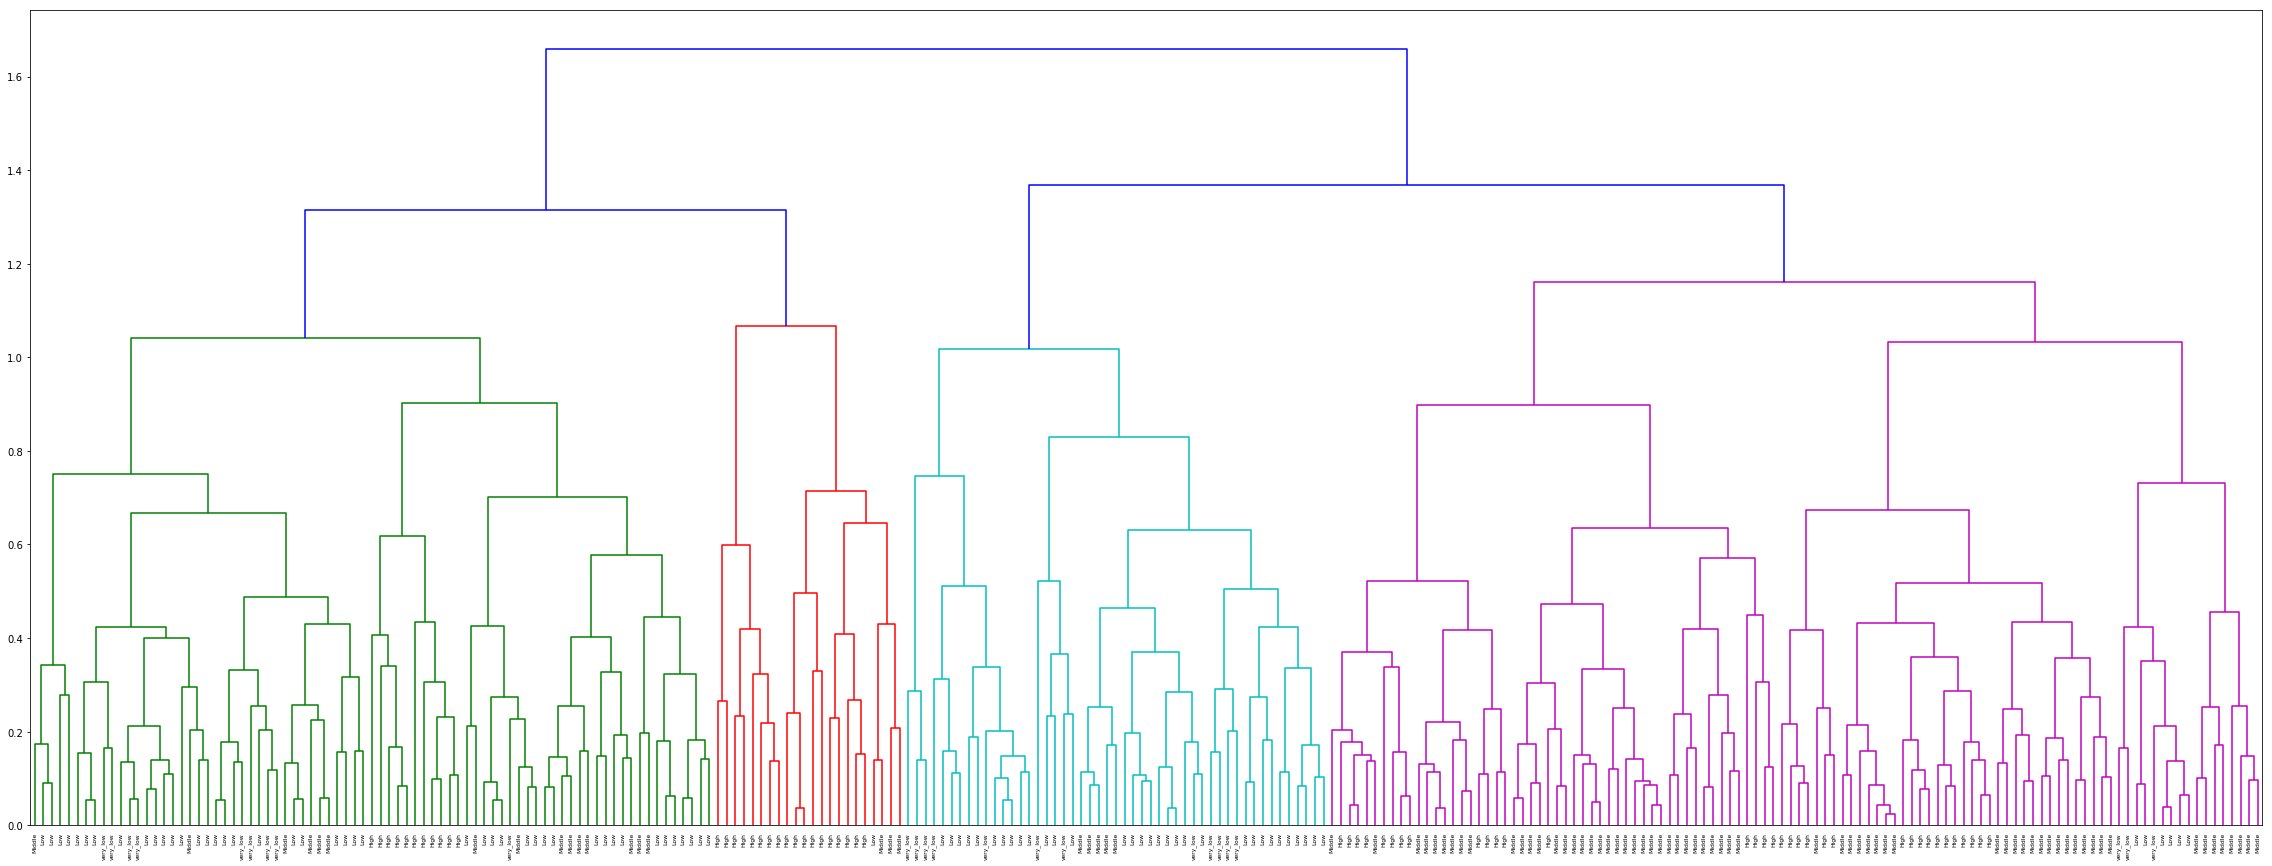

In [193]:
mergings=linkage(X,method='complete')
dendrogram(mergings,labels=y,leaf_rotation=90,leaf_font_size=6)
plt.gcf().set_size_inches(40, 15)
plt.show()

### normalizing X

In [194]:
plt.clf

from sklearn.preprocessing import normalize
X_norm = normalize(X)

In [195]:
X_norm

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.08508713,  0.10635891,  0.25526138,  0.95723017],
       [ 0.1424138 ,  0.11867817,  0.59339083,  0.78327589],
       ..., 
       [ 0.44497603,  0.58506108,  0.23896861,  0.63450286],
       [ 0.43100245,  0.69822397,  0.52582299,  0.22412128],
       [ 0.43352618,  0.49921196,  0.57146632,  0.4860748 ]])

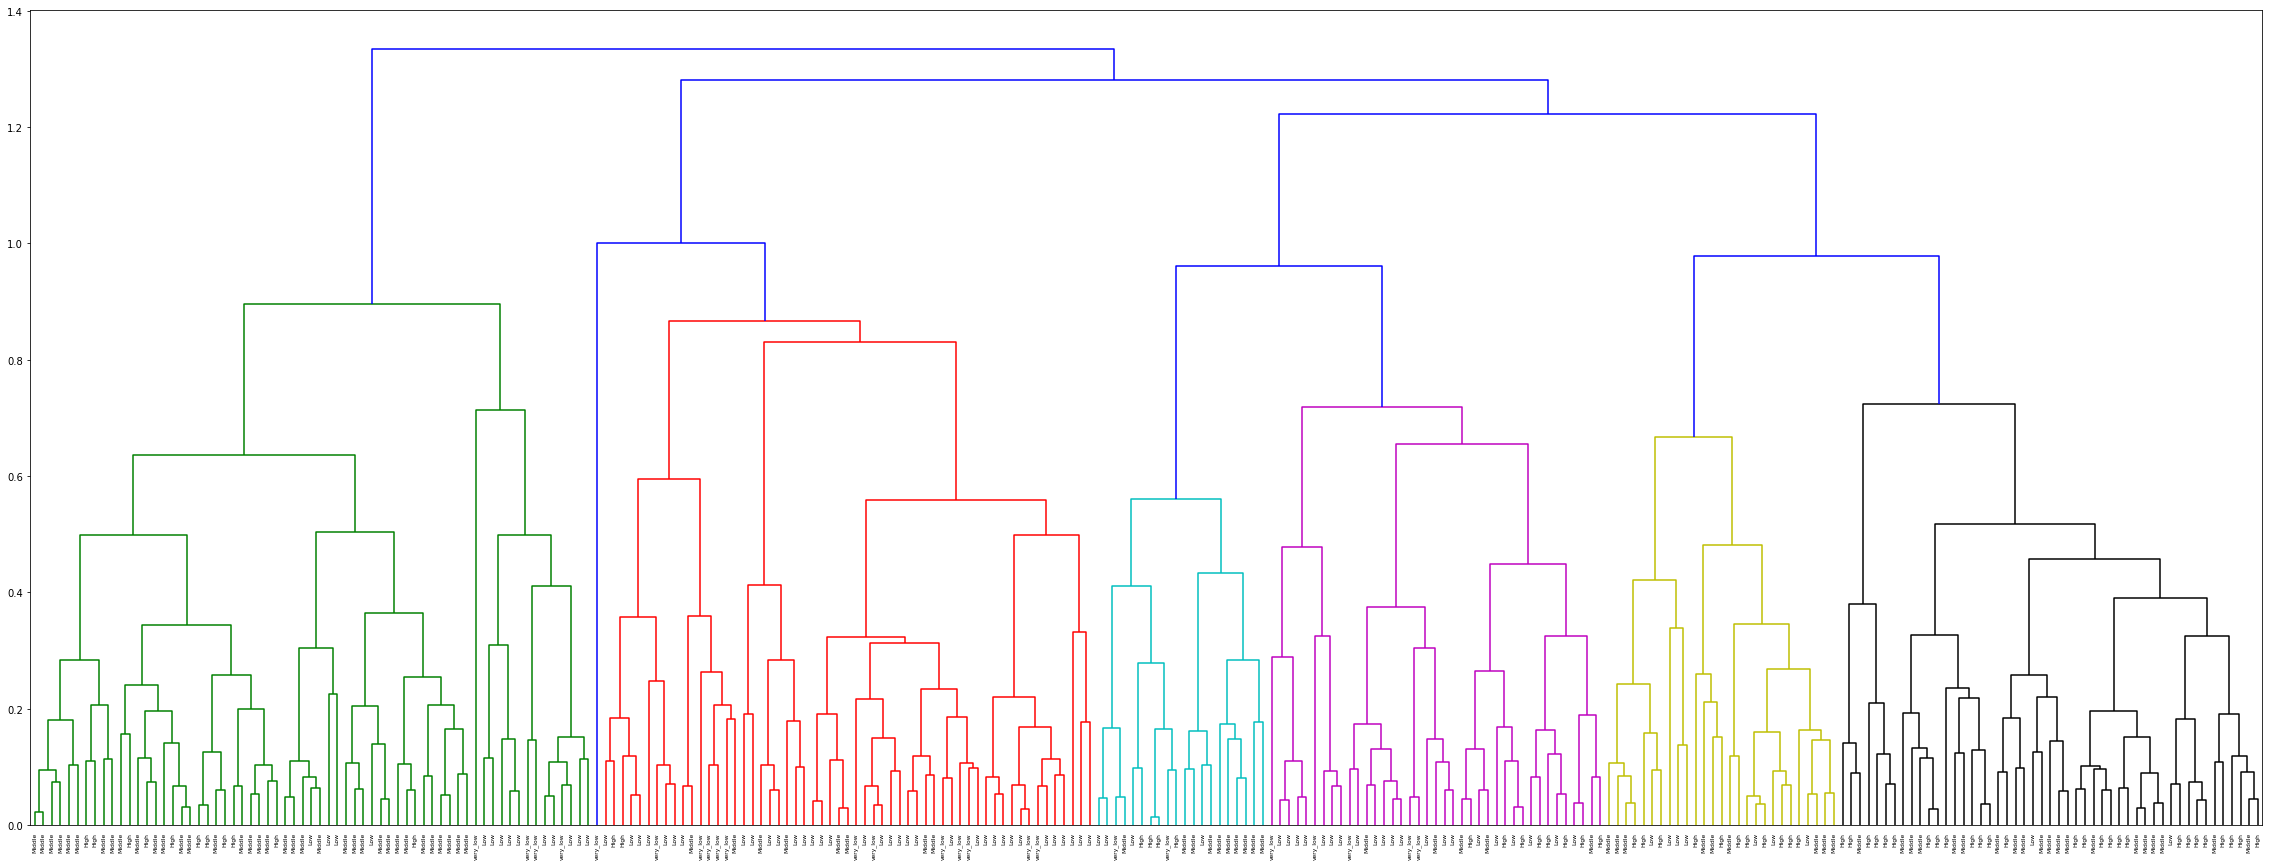

In [196]:
# Hierarchical clustering (normalized)
mergings=linkage(X_norm,method='complete')
dendrogram(mergings,labels=y,leaf_rotation=90,leaf_font_size=6)
plt.gcf().set_size_inches(40, 15)
plt.show()

### calculating distance

In [197]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 1, criterion='distance')
varieties = list(df['UNS'])
df3 = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df3.iloc[:,0], df3['varieties'])
df3.count()

labels       258
varieties    258
dtype: int64

In [198]:
df3.sample(5)

,labels,varieties
114,4,Middle
111,1,Low
22,4,Middle
156,1,Middle
208,3,very_low


In [199]:
ct

varieties,High,Low,Middle,very_low
labels,,,,
1,11,14,36,4
2,2,35,8,13
3,12,25,15,7
4,38,9,29,0


### K means

In [200]:
# on goal_results - pairing study time and exam performance for goal objects
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

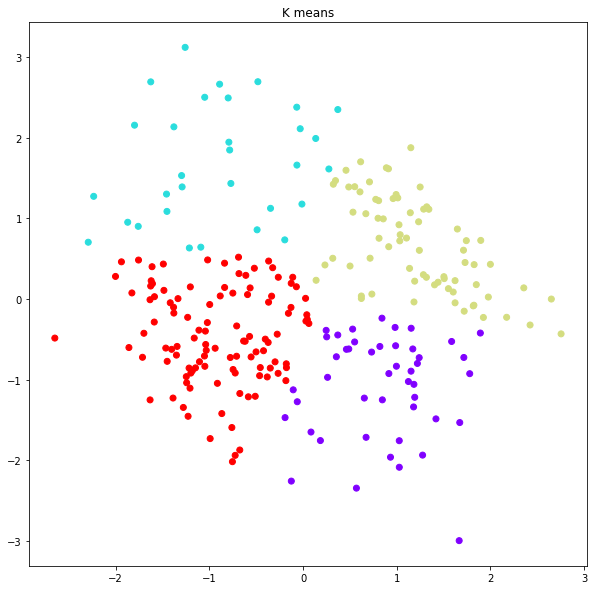

In [201]:
plt.gcf().set_size_inches(10, 10)
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.labels_,cmap='rainbow')
plt.title('K means')
plt.show()